In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from google.cloud import bigquery
%matplotlib inline
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="keys_big_query.json"

In [4]:
class AustinCrime:
    """Class to get data from BigQuery, cleaning and plotting"""
    def __init__(self,QUERY):
        """
        
        Parameters
        ----------
        QUERY: str

        """
        client = bigquery.Client()         # Start the BigQuery Client
        query_job = client.query(QUERY)    # Start Query API Request
        query_result = query_job.result()  # Get Query Result
        df = query_result.to_dataframe()  
        
        self.df = self.clean_data(df)
        
    @staticmethod
    def clean_data(df):
        """
         Drop data where location is NaN
         
         Parameters
         ----------
         df: pd.DataFrame
         
         Returns
         ----------
         pd.DataFrame
        """
        df = df[~df.location.isnull()]
        return df
    
    def card_plot(self,image_name = 'austin.png'):
        """
         Function to plot location data on the card.
         Card is loaded from *.png file
         
         Parameters
         ----------
         image_name: str
         
         Returns
         ----------
         None
        """
        plt.figure(figsize=(20,20))
        austin_img=mpimg.imread(image_name)
        plt.scatter(self.df['longitude'], self.df['latitude'],alpha=0.05)#c = df['description'].map(color_map)
        plt.imshow(austin_img, extent=[-98.157, -97.25, 30.07, 30.618], alpha=0.5)
        
    def popular_crime(self):
        """
         Function to plot 10th popular crime in bar plot
         
         Returns
         ----------
         None
        """
        self.df['description'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'barh')
        
    def crime_pie_chart(self,tresh):
        """
         Function to plot crime on a pie plot.
         Crimes number <= tresh will be ordered to 'Others' group
         
         Parameters
         ----------
         tresh: int
         
         Returns
         ----------
         None
        """
        a = self.df['description'].value_counts()
        b = a[a > tresh]
        b['Others'] = a[a <= tresh].sum()
        b.plot.pie(autopct='%1.1f%%')
        
        
        

        
        
        
        

/home/kasia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  


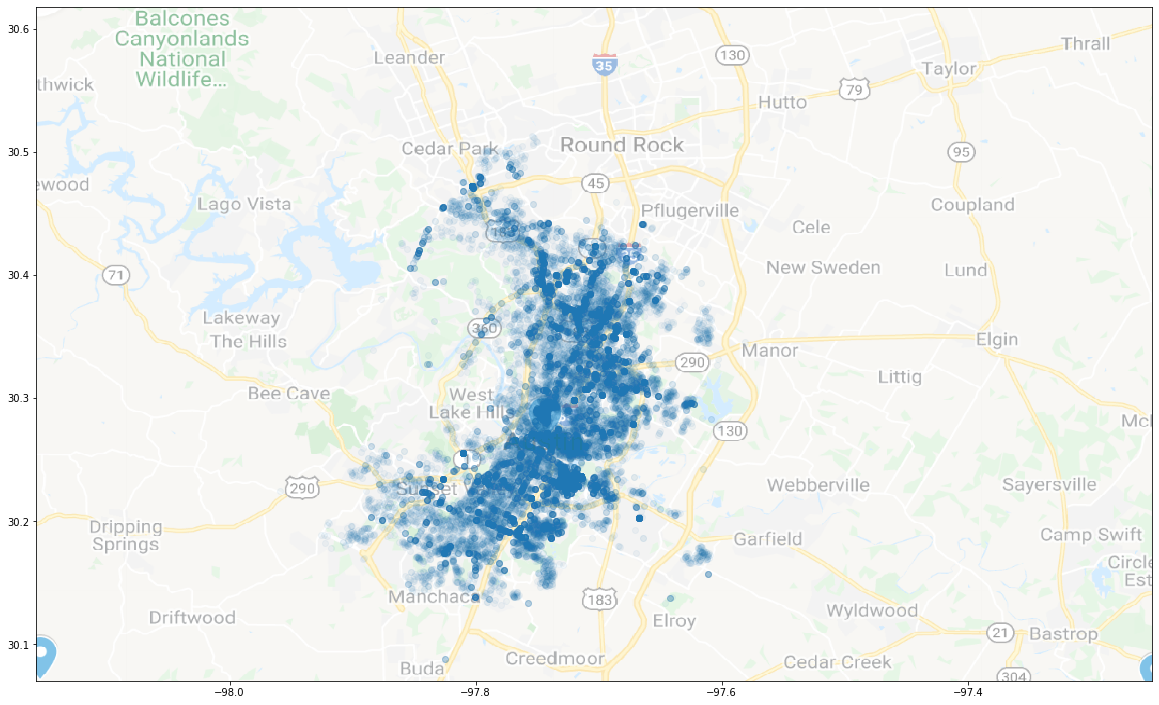

In [5]:
crime = AustinCrime('SELECT * FROM `bigquery-public-data.austin_crime.crime` ')

crime.card_plot()

In [ ]:

crime.popular_crime()